In [1]:
! pip install voronoi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 3.6 MB/s eta 0:00:0000:0100:01


In [8]:
import matplotlib.pyplot as plt 

In [23]:
from voronoi.point import Point
from voronoi.segment import Segment
from voronoi.diagram import Diagram
from voronoi.faces import Vertex

In [10]:
obstacles = [[[-2,-2],[8,-2], [8,8], [-2,8]],[[0,0],[2,0], [2,2], [0,2]],[[3,3],[6,3], [6,6], [3,6]]]

In [11]:
segments = []

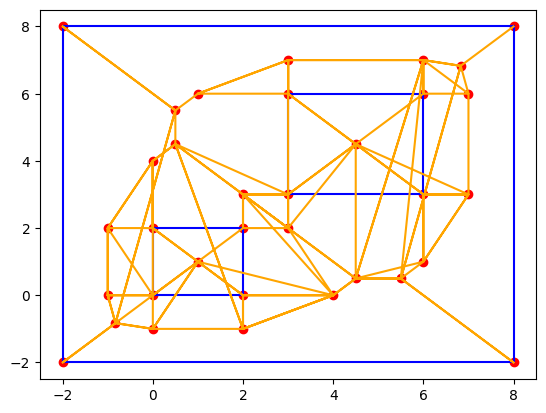

In [18]:
for obstacle in obstacles:
    for ix in range(0,len(obstacle)-1):
        p1 = obstacle[ix]
        p2 = obstacle[ix+1]
        plt.plot([p1[0],p2[0]], [p1[1],p2[1]],  color = 'blue')
        segments.append(Segment(Point(p1[0],p1[1]),Point(p2[0],p2[1])))

    p1 = obstacle[0]
    p2 = obstacle[-1]
    plt.plot([p1[0],p2[0]], [p1[1],p2[1]],  color = 'blue')
    segments.append(Segment(Point(p1[0],p1[1]),Point(p2[0],p2[1])))

diagram = Diagram()
diagram.construct([], segments)

# Plot the Voronoi edges
for vertex in diagram.vertices:
    plt.scatter(vertex.x,vertex.y, color = 'red')

# Extract edge vertices
edge_vertices = []
for edge in diagram.edges:
    start = edge.start
    end = edge.end
    if start is not None and end is not None:
        edge_vertices.append((start.x, start.y))
        edge_vertices.append((end.x, end.y))

x, y = zip(*edge_vertices)

# Plot the Voronoi edges
plt.plot(x, y, color='orange')  # 'bo-' means blue color, solid line, circle marker

plt.show()

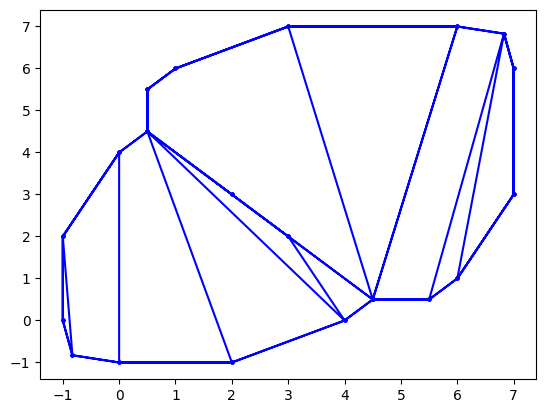

In [30]:
# Extract obstacle vertices
obstacle_vertices = []

for obstacle in obstacles:
    obstacle_vertices.extend(obstacle)

# Convert obstacle vertices to Vertex objects
obstacle_vertices = [Vertex(x, y) for x, y in obstacle_vertices]

# Extract edge vertices and remove those corresponding to obstacle vertices
filtered_edge_vertices = []
for edge in diagram.edges:
    start = edge.start
    end = edge.end

    if start is not None and end is not None:
        # Check if both start and end vertices are not obstacle vertices
        if start not in obstacle_vertices and end not in obstacle_vertices:
            filtered_edge_vertices.append((start.x, start.y))
            filtered_edge_vertices.append((end.x, end.y))

# Unzip the filtered vertices into separate lists for x and y coordinates
x, y = zip(*filtered_edge_vertices)

# Plot the simplified Voronoi diagram
plt.plot(x, y, 'bo-', markersize=2)  # 'bo-' means blue color, solid line, circle marker
plt.show()


In [32]:
diagram.vertices

[Vertex(-2.0, -2.0),
 Vertex(-2.0, 8.0),
 Vertex(-1.0, 0.0),
 Vertex(-1.0, 2.0),
 Vertex(0.0, 0.0),
 Vertex(0.0, 2.0),
 Vertex(-0.8284271247461902, -0.8284271247461902),
 Vertex(0.0, -1.0),
 Vertex(0.0, 4.0),
 Vertex(2.0, 0.0),
 Vertex(1.0, 1.0),
 Vertex(2.0, 2.0),
 Vertex(2.0, -1.0),
 Vertex(2.0, 3.0),
 Vertex(0.5, 4.5),
 Vertex(0.5, 5.5),
 Vertex(1.0, 6.0),
 Vertex(3.0, 3.0),
 Vertex(3.0, 6.0),
 Vertex(3.0, 2.0),
 Vertex(3.0, 7.0),
 Vertex(4.0, 0.0),
 Vertex(6.0, 3.0),
 Vertex(4.5, 4.5),
 Vertex(6.0, 6.0),
 Vertex(4.5, 0.5),
 Vertex(6.0, 7.0),
 Vertex(8.0, -2.0),
 Vertex(5.5, 0.5),
 Vertex(6.0, 1.0),
 Vertex(7.0, 3.0),
 Vertex(7.0, 6.0),
 Vertex(6.82842712474619, 6.82842712474619),
 Vertex(8.0, 8.0)]